In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import random
import matplotlib.cm as cm

with open('pickles\List_of_radial_object_all_minutes_v3.pkl', 'rb') as f:
    loaded_radial_dist_list = pickle.load(f)




<>:8: SyntaxWarning: invalid escape sequence '\L'
<>:8: SyntaxWarning: invalid escape sequence '\L'
C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_21352\2374274515.py:8: SyntaxWarning: invalid escape sequence '\L'
  with open('pickles\List_of_radial_object_all_minutes_v3.pkl', 'rb') as f:


In [12]:
loaded_radial_dist_list[0]
loaded_radial_dist_list[32484][20]

0.013402586315878536

86400
The maximum length of the lists is 100


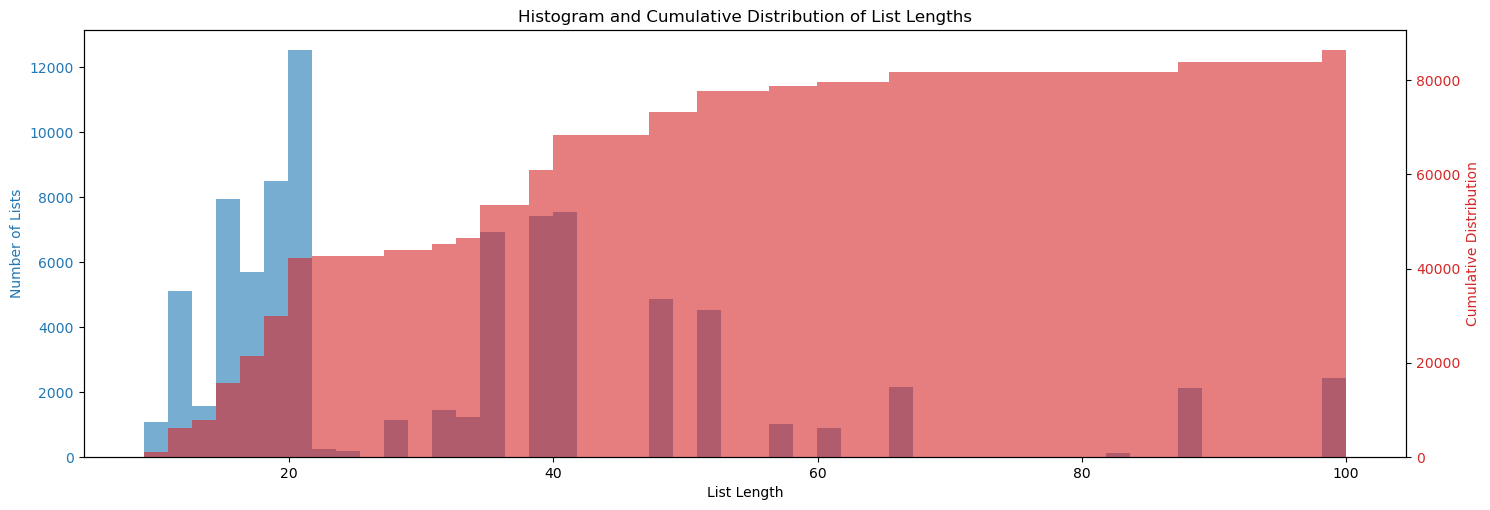

In [7]:
print(len(loaded_radial_dist_list))

# for list in loaded_radial_dist_list:
#     print(len(list))

loaded_list_lengths = [len(list) for list in loaded_radial_dist_list]
print(f"The maximum length of the lists is {max(loaded_list_lengths)}")
fig, ax1 = plt.subplots(figsize=(15, 5))

color = 'tab:blue'
ax1.set_xlabel('List Length')
ax1.set_ylabel('Number of Lists', color=color)
ax1.hist(loaded_list_lengths, bins=50, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Distribution', color=color)
ax2.hist(loaded_list_lengths, bins=50, cumulative=True, color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Histogram and Cumulative Distribution of List Lengths')
plt.show()


In [ ]:
len(loaded_radial_dist_list)

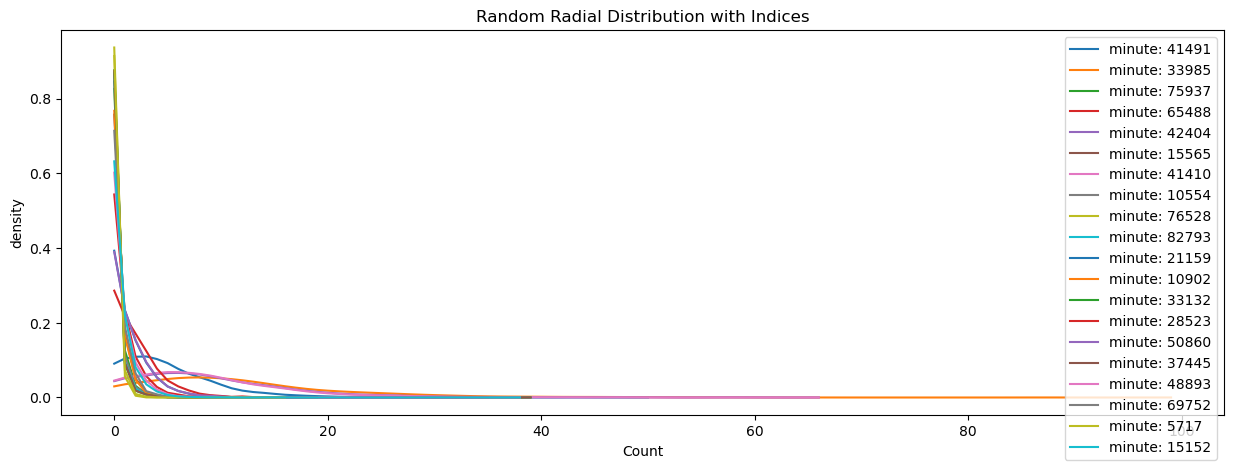

In [13]:
n_plots = 20
random_indices = random.sample(range(len(loaded_radial_dist_list)), n_plots)
biggest_indices = sorted(range(len(loaded_radial_dist_list)), key=lambda i: len(loaded_radial_dist_list[i]), reverse=True)[:n_plots]

plot_indices = [random_indices, biggest_indices]

plt.figure(figsize=(15, 5))
for idx in plot_indices[0]:
    rd = loaded_radial_dist_list[idx]
    plt.plot(rd, label=f'minute: {idx}')  
 



plt.legend()
plt.title('Random Radial Distribution with Indices')
plt.xlabel('Count')
plt.ylabel('density')
plt.show()

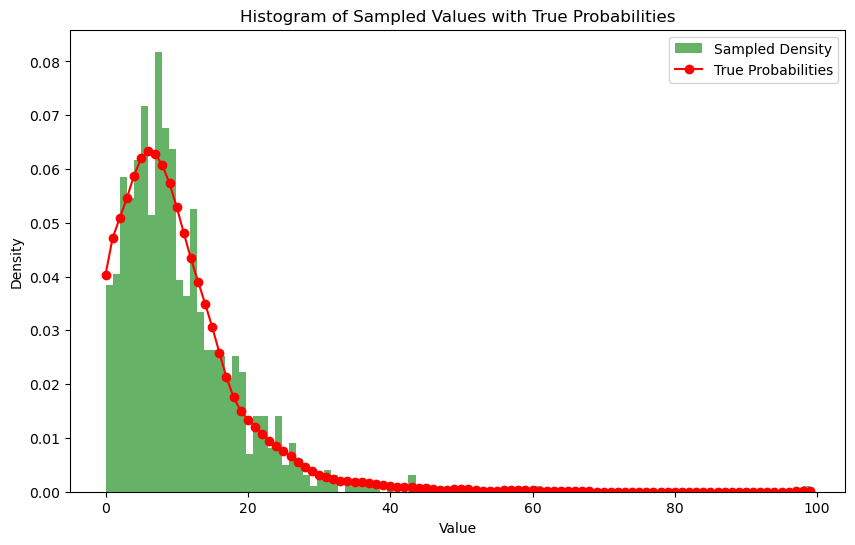

In [ ]:
import random
import numpy as np

def generate_sample(probabilities, size=1):
    """Generate sample given array defining discrete probability distribution.

    Parameters:
    probabilities (ndarray): An ndarray of probabilities for each discrete integer value.
    size (int): The number of samples to generate.

    Returns:
    ndarray: An ndarray of generated samples.
    """
    values = np.arange(len(probabilities))
    sample = random.choices(values, weights=probabilities, k=size)
    return np.array(sample, dtype=int)

# Example usage
probabilities = loaded_radial_dist_list[32484]
sample_size = 1000
sample = generate_sample(probabilities, sample_size)

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=len(probabilities), density=True, alpha=0.6, color='g', label='Sampled Density')

# Verification plot
plt.plot(np.arange(len(probabilities)), probabilities, 'ro-', label='True Probabilities')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Sampled Values with True Probabilities')
plt.legend()
plt.show()
